In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.cutthecord.com/wp-content/uploads/2017/11/netflix-logo.jpg")

# EDA - Netflix Shows & Movies

The netflix dataset consists of TV shows and Movies available on Netflix as of 2019. There are 6234 rows, one row for each show and 12 columns listing the attributes such as the title, rating, cast and director. In this jupyter notebook, I have analysed this dataset to find top insights and findings.

## Downloading the Dataset

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
dataset_url = 'https://www.kaggle.com/shivamb/netflix-shows' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kotkarpranit
Your Kaggle Key: ········


100%|███████████████████████████████████████████████████████████████████████████████| 971k/971k [00:00<00:00, 10.6MB/s]

The dataset has been downloaded and extracted.

Let us save and upload our work to Jovian before continuing.

In [5]:
project_name = "netflix-shows-and-movies" 

In [6]:
!pip install jovian --upgrade -q

In [7]:
import jovian

In [8]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "pranitkotkar09/netflix-shows-and-movies" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/pranitkotkar09/netflix-shows-and-movies


'https://jovian.ai/pranitkotkar09/netflix-shows-and-movies'

## Data Preparation and Cleaning

In [9]:
import pandas as pd

In [10]:
netflix_df = pd.read_csv('netflix-shows/netflix_titles.csv')

In [11]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [12]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [13]:
## add new features in the dataset
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

In [14]:
netflix_df.describe()

,show_id,release_year,year_added,month_added
count,6.234000e+03,6234.00000,6223.000000,6223.000000
mean,7.670368e+07,2013.35932,2017.983288,6.837538
std,1.094296e+07,8.81162,1.204851,3.621890
min,2.477470e+05,1925.00000,2008.000000,1.000000
25%,8.003580e+07,2013.00000,2017.000000,4.000000
50%,8.016337e+07,2016.00000,2018.000000,7.000000
75%,8.024489e+07,2018.00000,2019.000000,10.000000
max,8.123573e+07,2020.00000,2020.000000,12.000000


In [15]:
import jovian

In [16]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "pranitkotkar09/netflix-shows-and-movies" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/pranitkotkar09/netflix-shows-and-movies


'https://jovian.ai/pranitkotkar09/netflix-shows-and-movies'

## Exploratory Analysis and Visualization

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [17]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Number of content present on Netflic according to it's original releae year.

In [18]:
content_released = netflix_df.groupby('release_year').sum()

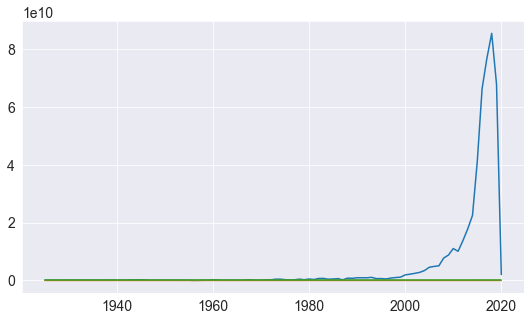

In [19]:
plt.plot(content_released);

Through the above chart we are able to see the number of content on netflix according to their release dates.

Netflix content type

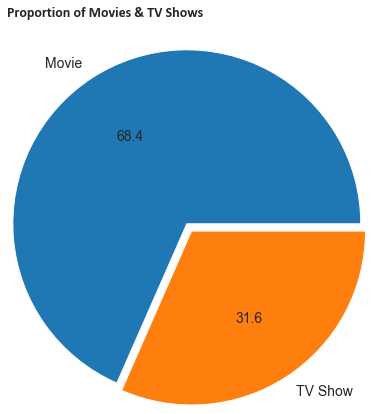

In [20]:
labels = netflix_df.type.value_counts().index
vals = netflix_df.type.value_counts().values
plt.pie(vals, explode=[0, 0.08], radius=1.6, labels=labels, autopct='%.1f', textprops={'fontsize': 14})
plt.title('Proportion of Movies & TV Shows', fontsize=14, fontfamily='calibri', fontweight='bold', position=(0.20, 1.22+0.02))
plt.show()

Here, we can see that 68.4% of content present on Netflix is in the form of movies and 31.6% in the form of TV shows.

Cont of rating by content type

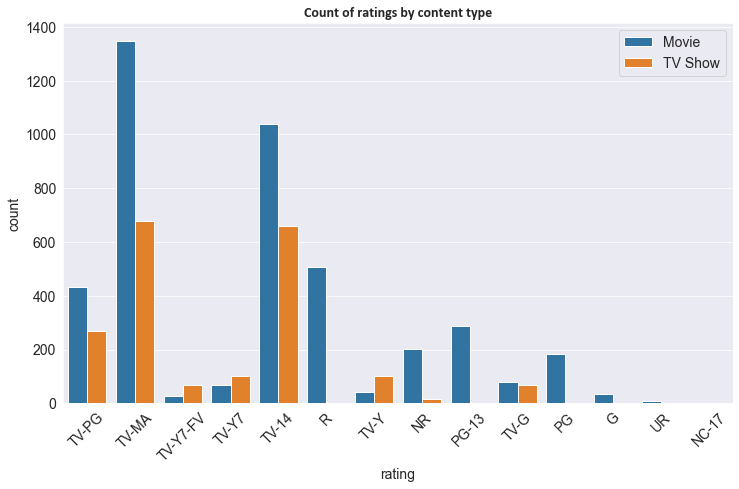

In [21]:
rating_content_type = netflix_df[['type', 'rating']]
plt.figure(figsize=(12,7))
sns.countplot(rating_content_type['rating'], hue=rating_content_type['type'])
plt.xticks(rotation=45)
plt.title('Count of ratings by content type', fontsize=14, fontweight='bold', fontfamily='calibri')
plt.legend(loc='upper right')
plt.show()

Through the above chart we are able to see the count of ratings by content type.

Content added on netflix each year till 2020.

In [22]:
content_added = netflix_df.groupby('year_added').sum()

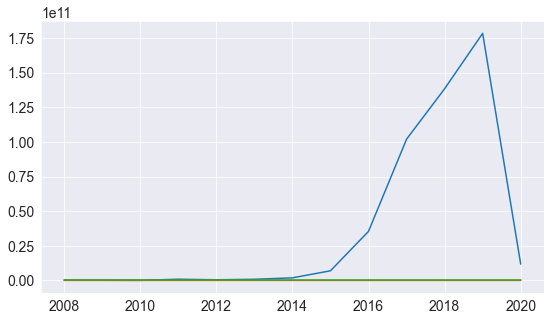

In [23]:
plt.plot(content_added);

Here we are able to see the trend of content getting added on Netflix.

In [24]:
import jovian

In [25]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "pranitkotkar09/netflix-shows-and-movies" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/pranitkotkar09/netflix-shows-and-movies


'https://jovian.ai/pranitkotkar09/netflix-shows-and-movies'

## Asking and Answering Questions

#### Q1: Which are the top genres by count of shows?

In [26]:
from collections import Counter

In [27]:
genre = list(netflix_df['listed_in'])
genres = []

for i in genre:
    j = list(i.split(','))
    for k in j:
        genres.append(k.strip())
genre_count = dict(Counter(genres).most_common(15)) #get the top 15 genres 
genre_count

{'International Movies': 1927,
 'Dramas': 1623,
 'Comedies': 1113,
 'International TV Shows': 1001,
 'Documentaries': 668,
 'TV Dramas': 599,
 'Action & Adventure': 597,
 'Independent Movies': 552,
 'TV Comedies': 436,
 'Thrillers': 392,
 'Children & Family Movies': 378,
 'Romantic Movies': 376,
 'Crime TV Shows': 363,
 "Kids' TV": 328,
 'Stand-Up Comedy': 281}

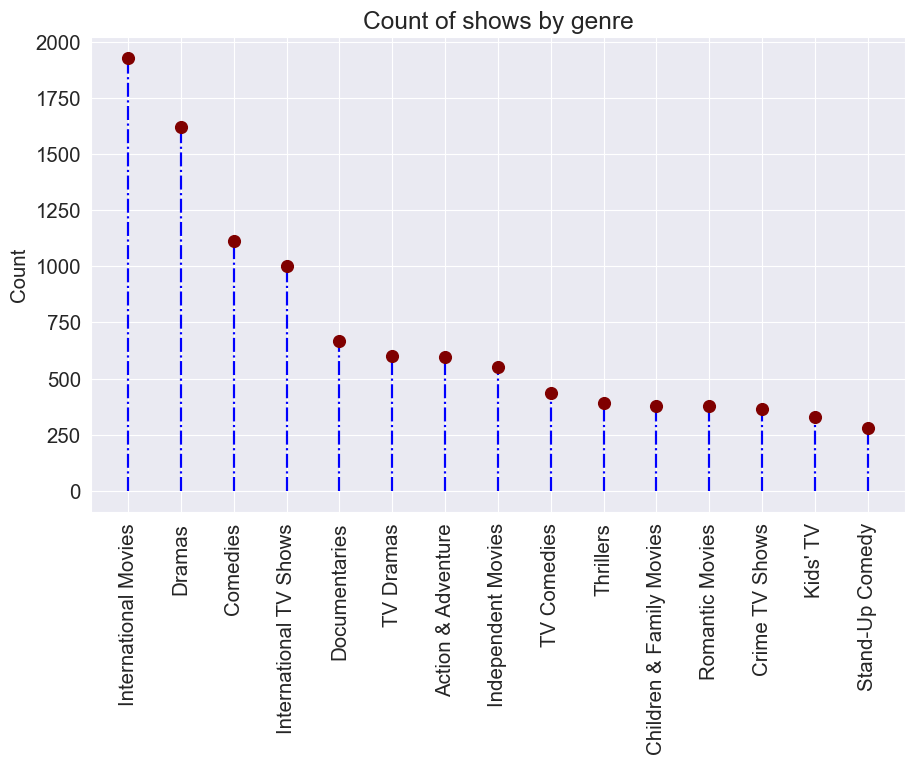

In [28]:
fig, ax = plt.subplots(figsize=(10,6), dpi=105)
x=list(genre_count.keys())
y=list(genre_count.values())
ax.vlines(x, ymin=0, ymax=y, color='blue', linestyle='dashdot')
ax.plot(x,y, "o", color='maroon', markersize=8)
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count")
ax.set_title("Count of shows by genre")
plt.show()

#### Q2: When was the content added during the observation period: 2008 - 2020?

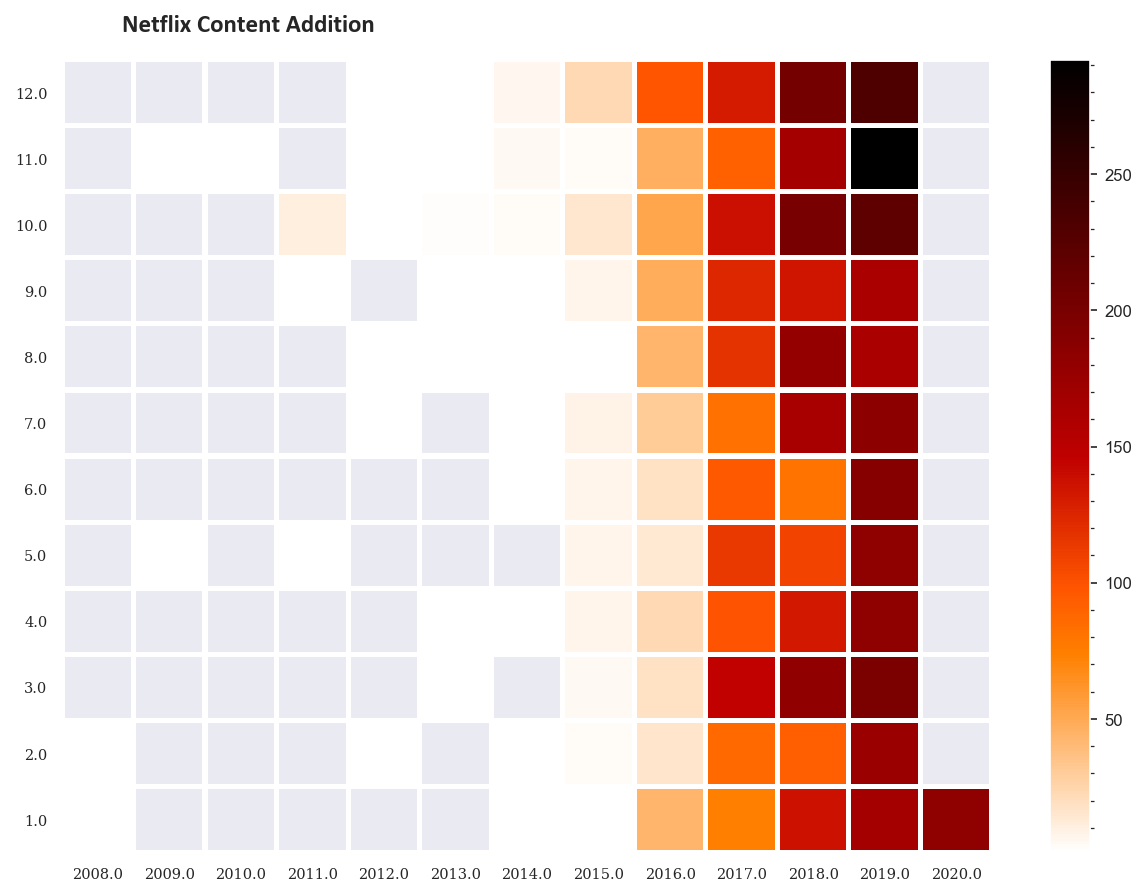

In [29]:
import numpy as np
month_count = netflix_df.groupby('year_added')['month_added'].value_counts().unstack().T
plt.figure(figsize=(10, 7), dpi=150)
# plot heatmap of content addition
plt.pcolormesh(month_count, cmap='gist_heat_r', edgecolors='white', linewidths=2) 
plt.xticks(np.arange(0.5, len(month_count.columns), 1), month_count.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(month_count.index), 1), month_count.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Content Addition', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

#### Q3: Actors with most shows on Netflix from India, US & UK

In [30]:
def list_top_actors(country, num_actors):
    
    """
    This function returns a table with top num_actors of actors from a chosen country
    """
    df = pd.DataFrame(netflix_df['cast'][netflix_df.country==country]).dropna()
    top_actors = []
    cast = list(df.cast)
    for i in cast:
        j = i.split(',')
        for k in j:
            top_actors.append(k.strip()) 
    top_actors = pd.DataFrame(Counter(top_actors).most_common(num_actors)).rename(columns={0:'Cast', 1:'Count'})
    return top_actors

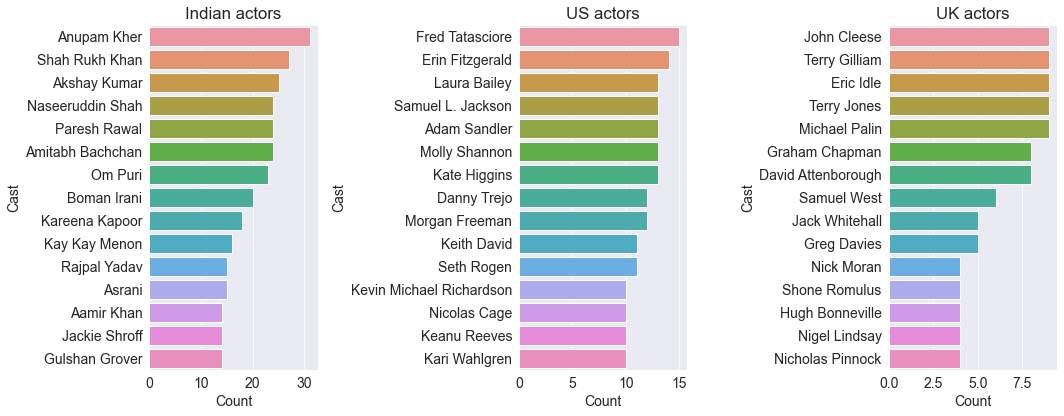

In [31]:
indian_actors = list_top_actors('India', 15)
us_actors = list_top_actors('United States',15)
uk_actors = list_top_actors('United Kingdom',15)

# plotting three bar graphs in one row 
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,6))
sns.barplot(x='Count', y='Cast', data=indian_actors, ax=ax1)
ax1.set_title('Indian actors')
sns.barplot(x='Count', y='Cast', data=us_actors, ax=ax2)
ax2.set_title('US actors')
sns.barplot(x='Count', y='Cast', data=uk_actors, ax=ax3)
ax3.set_title('UK actors')
plt.tight_layout()
plt.show()

#### Q4: Directors with most shows on Netflix from India, US & UK

In [32]:
def list_top_directors(country, num_directors):
    """
    This function returns a table with top num_directors of directors from chosen country
    """
    df = pd.DataFrame(netflix_df['director'][netflix_df.country==country]).dropna()
    top_directors = []
    crew = list(df.director)
    for i in crew:
        j = i.split(',')
        for k in j:
            top_directors.append(k.strip()) 
    top_actors = pd.DataFrame(Counter(top_directors).most_common(num_directors)).rename(columns={0:'Crew', 1:'Count'})
    return top_actors

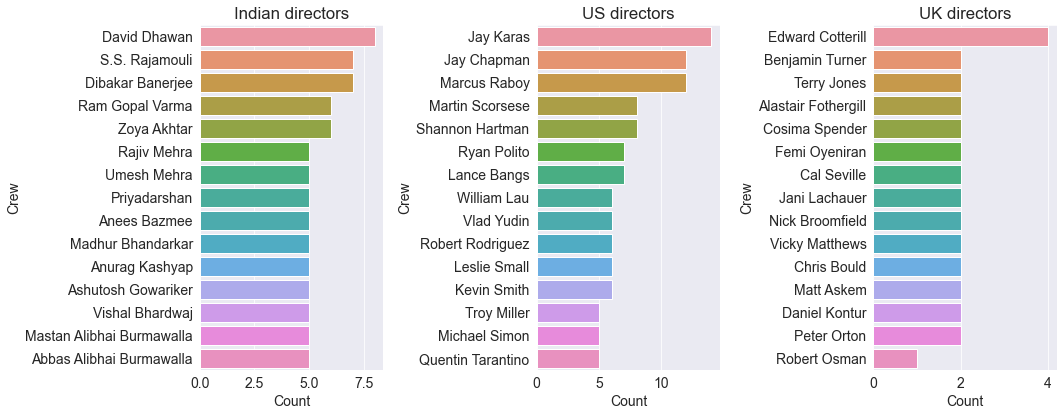

In [33]:
indian_directors = list_top_directors('India', 15)
us_directors = list_top_directors('United States',15)
uk_directors = list_top_directors('United Kingdom',15)

# plotting three bar graphs in one row 
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,6))
sns.barplot(x='Count', y='Crew', data=indian_directors, ax=ax1)
ax1.set_title('Indian directors')
sns.barplot(x='Count', y='Crew', data=us_directors, ax=ax2)
ax2.set_title('US directors')
sns.barplot(x='Count', y='Crew', data=uk_directors, ax=ax3)
ax3.set_title('UK directors')
plt.tight_layout()
plt.show()

Let us save and upload our work to Jovian before continuing.

In [34]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "pranitkotkar09/netflix-shows-and-movies" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/pranitkotkar09/netflix-shows-and-movies


'https://jovian.ai/pranitkotkar09/netflix-shows-and-movies'

## Inferences and Conclusion

Hence, using the datset for netflix movie and shows we have done the exploratory data analysis along with the visualization using various methods mentioned above.

In [36]:
import jovian

In [37]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "pranitkotkar09/netflix-shows-and-movies" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/pranitkotkar09/netflix-shows-and-movies


'https://jovian.ai/pranitkotkar09/netflix-shows-and-movies'

## References and Future Work

This EDA will be helpful in future for making recommendation systems for Netflix.

In [38]:
import jovian

In [39]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "pranitkotkar09/netflix-shows-and-movies" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/pranitkotkar09/netflix-shows-and-movies


'https://jovian.ai/pranitkotkar09/netflix-shows-and-movies'

In [40]:
jovian.submit(assignment="zero-to-pandas-project")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "pranitkotkar09/netflix-shows-and-movies" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/pranitkotkar09/netflix-shows-and-movies
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
